In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data1 = pd.read_csv('data/train.tsv',sep="\t")
test_data1 = pd.read_csv('data/dev.tsv',sep="\t")
train_data2 = pd.read_csv('data/unsmile_train_v1.0.tsv',sep="\t")
test_data2 = pd.read_csv('data/unsmile_valid_v1.0.tsv',sep="\t")
train_data3 = pd.read_csv('data/dataset.txt',sep="|", error_bad_lines=False, header=None)


b'Skipping line 456: expected 2 fields, saw 3\n'


In [3]:
train_data1['label'] = [1 if s =="hate" else 0 for s in train_data1['hate']]
test_data1['label'] = [1 if s =="hate" else 0 for s in test_data1['hate']]
train_data1.rename(columns = {'comments' : 'document'}, inplace = True)
train_data1 = train_data1[['document','label']]
test_data1.rename(columns = {'comments' : 'document'}, inplace = True)
test_data1 = test_data1[['document','label']]

In [4]:
train_data2['label'] = [1 if s == 0 else 0 for s in train_data2['clean']]
train_data2.rename(columns = {'문장' : 'document'}, inplace = True)
train_data2 = train_data2[['document','label']]
test_data2['label'] = [1 if s == 0 else 0 for s in test_data2['clean']]
test_data2.rename(columns = {'문장' : 'document'}, inplace = True)
test_data2 = test_data2[['document','label']]

In [5]:
train_data3.rename(columns = {0 : 'document', 1 : 'label'}, inplace = True)

In [6]:
train_data = pd.concat([train_data1, train_data2, train_data3])
test_data = pd.concat([test_data1, test_data2])
train_data['id'] = train_data.index
test_data['id'] = test_data.index
train_data = train_data[['id','document','label']]
test_data = test_data[['id','document','label']]
train_data['document'].replace('(.*)\t(.*)', r'\1 \2', inplace = True, regex=True)
test_data['document'].replace('(.*)\t(.*)', r'\1 \2', inplace = True, regex=True)


In [7]:
train_data.shape, test_data.shape

((28725, 3), (4208, 3))

In [8]:
train_data.to_csv('train_data.tsv', index=False, header=True, sep="\t")
test_data.to_csv('test_data.tsv', index=False, header=True, sep="\t")

리뷰의 최대 길이 : 1000
리뷰의 평균 길이 : 38.26506527415144


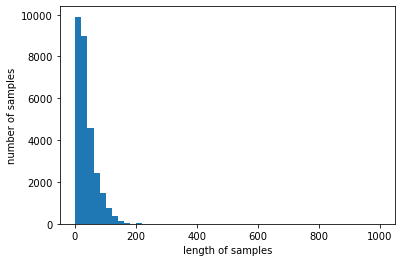

In [9]:
print('리뷰의 최대 길이 :',max(len(review) for review in train_data['document']))
print('리뷰의 평균 길이 :',sum(map(len, train_data['document']))/len(train_data['document']))
plt.hist([len(review) for review in train_data['document']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

리뷰의 최대 길이 : 149
리뷰의 평균 길이 : 39.161121673003805


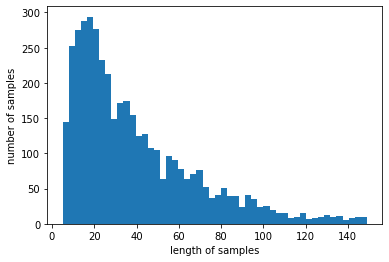

In [10]:
print('리뷰의 최대 길이 :',max(len(review) for review in test_data['document']))
print('리뷰의 평균 길이 :',sum(map(len, test_data['document']))/len(test_data['document']))
plt.hist([len(review) for review in test_data['document']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [11]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [12]:
max_len = [60, 90 ,120,150]
for s in max_len:
    print('train')
    below_threshold_len(s, train_data['document'])
    print('test')
    below_threshold_len(s, test_data['document'])
    print('-'*60)


train
전체 샘플 중 길이가 60 이하인 샘플의 비율: 81.72671888598782
test
전체 샘플 중 길이가 60 이하인 샘플의 비율: 79.91920152091255
------------------------------------------------------------
train
전체 샘플 중 길이가 90 이하인 샘플의 비율: 93.02001740644037
test
전체 샘플 중 길이가 90 이하인 샘플의 비율: 92.79942965779468
------------------------------------------------------------
train
전체 샘플 중 길이가 120 이하인 샘플의 비율: 97.80330722367276
test
전체 샘플 중 길이가 120 이하인 샘플의 비율: 97.93250950570342
------------------------------------------------------------
train
전체 샘플 중 길이가 150 이하인 샘플의 비율: 99.50565709312446
test
전체 샘플 중 길이가 150 이하인 샘플의 비율: 100.0
------------------------------------------------------------
